# Задание №2
Предобработка датасета с последующим обучение модели с цель предсказания оценки.
Датасет представляет собой набор отзывов о препаратах.

Подключение библиотек и набора данных:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from google.colab import drive
drive.mount('/content/gdrive/')
data = pd.read_csv('/content/gdrive/My Drive/drug_reviews.csv', index_col='uniqueID')
data.head()


Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


,drugName,condition,review,rating,date,usefulCount
uniqueID,,,,,,
163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


Выясним распределение оценок

Text(0, 0.5, 'Количество')

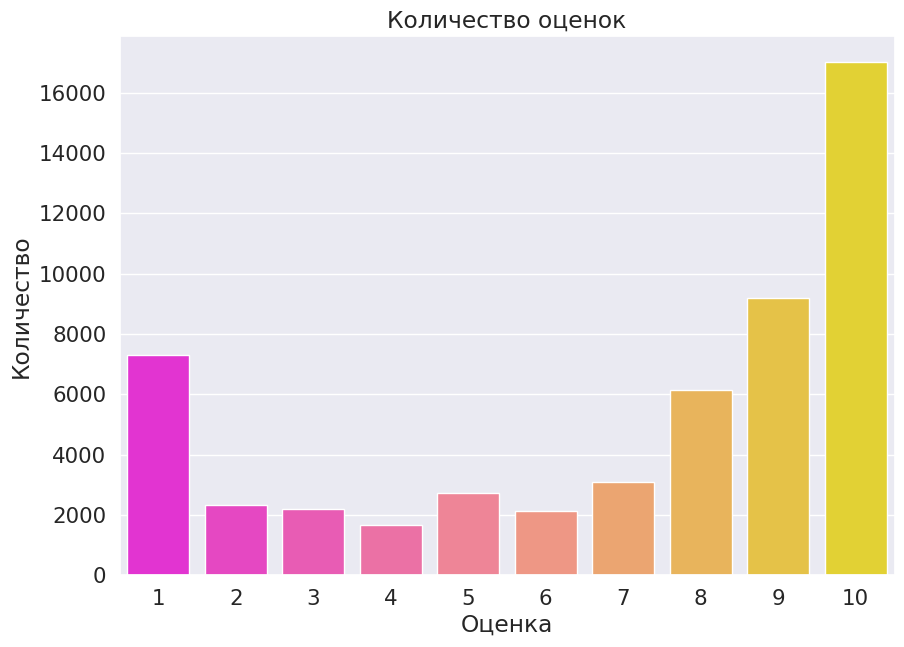

In [ ]:
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [10, 7]

sns_ = sns.countplot(x= 'rating', data = data, palette = 'spring')
sns_.set_title('Количество оценок')
sns_.set_xlabel("Оценка")
sns_.set_ylabel("Количество")

 В ходе данной работы передо мной стоят задачи выяснить и визуализировать ответы на следующие вопросы:    

*   Какие лекарства представлены?
*   На какие болезни они направлены?
*   Какие лекарства чаще всего используются для наиболее частых болезней?
*   Как зависит качество лекарства в обзорах людей от его популярности?
*   Какие еще можно сделать выводы из группировки?



## **Какие лекарства представлены**

Сначала необходимо выснять сколько уникальный названий лекарств представленно

In [ ]:
print("Уникальных названий -",data['drugName'].nunique())

Уникальных названий - 2637


Далее узнать какие лекарства самые распространенные

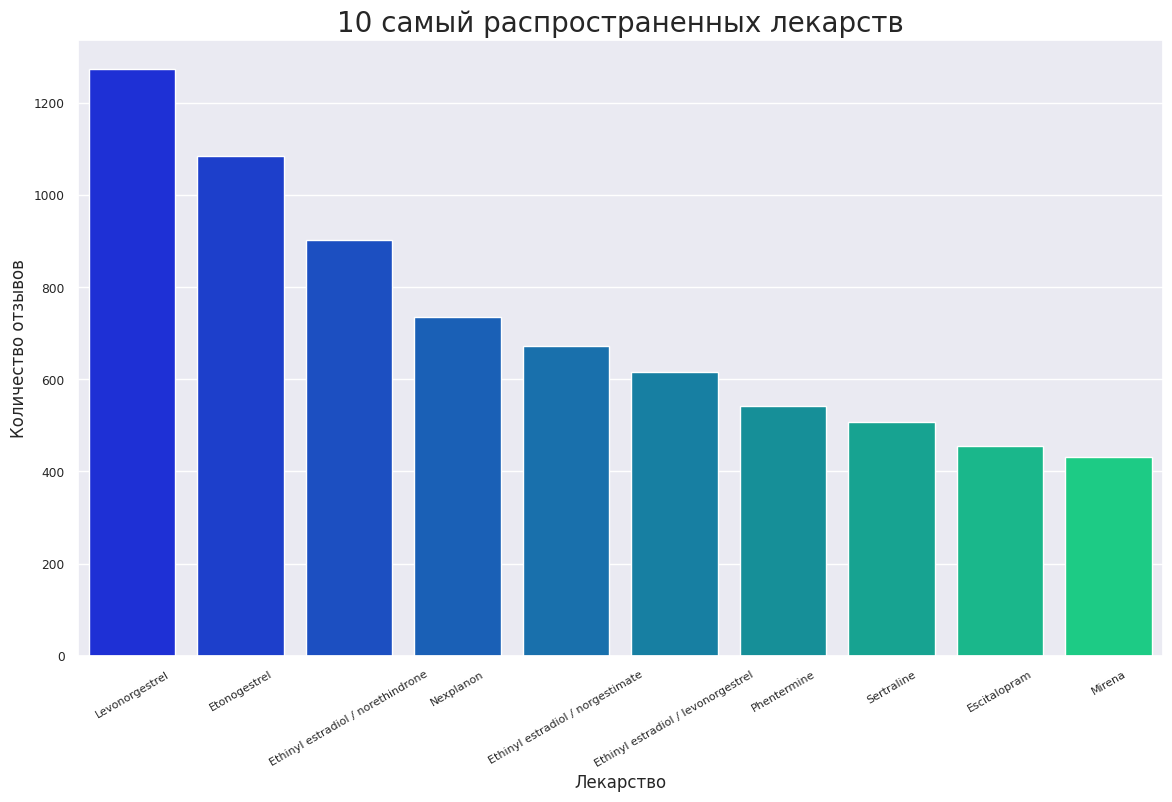

In [ ]:
#разбиение данных о количестве обзоров на лекарства на словари упорядоченные по количеству
cond = dict(data['drugName'].value_counts())

#запись 10 первых названий лекарств
top_drugName = list(cond.keys())[0:10]

#запись 10 первых значений количества обзоров на лекарства
values = list(cond.values())[0:10]

#настройка внешнего вида фигуры
sns.set(style = 'darkgrid', font_scale = 0.8)
plt.rcParams['figure.figsize'] = [14, 8]
plt.xticks(rotation = 30, fontsize = 8)

sns_ = sns.barplot(x = top_drugName, y = values, palette = 'winter')
sns_.set_title("10 самый распространенных лекарств",fontsize= 20)
sns_.set_xlabel("Лекарство", fontsize = 12)
sns_.set_ylabel("Количество отзывов", fontsize = 12);

## **На какие болезни они направлены**

Теперь, используя полученные данные о самых распространенных препаратах, можно оценить с какими болезнями их принимали


<ipython-input-59-c2f06ed67f5a>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 2, i+1)


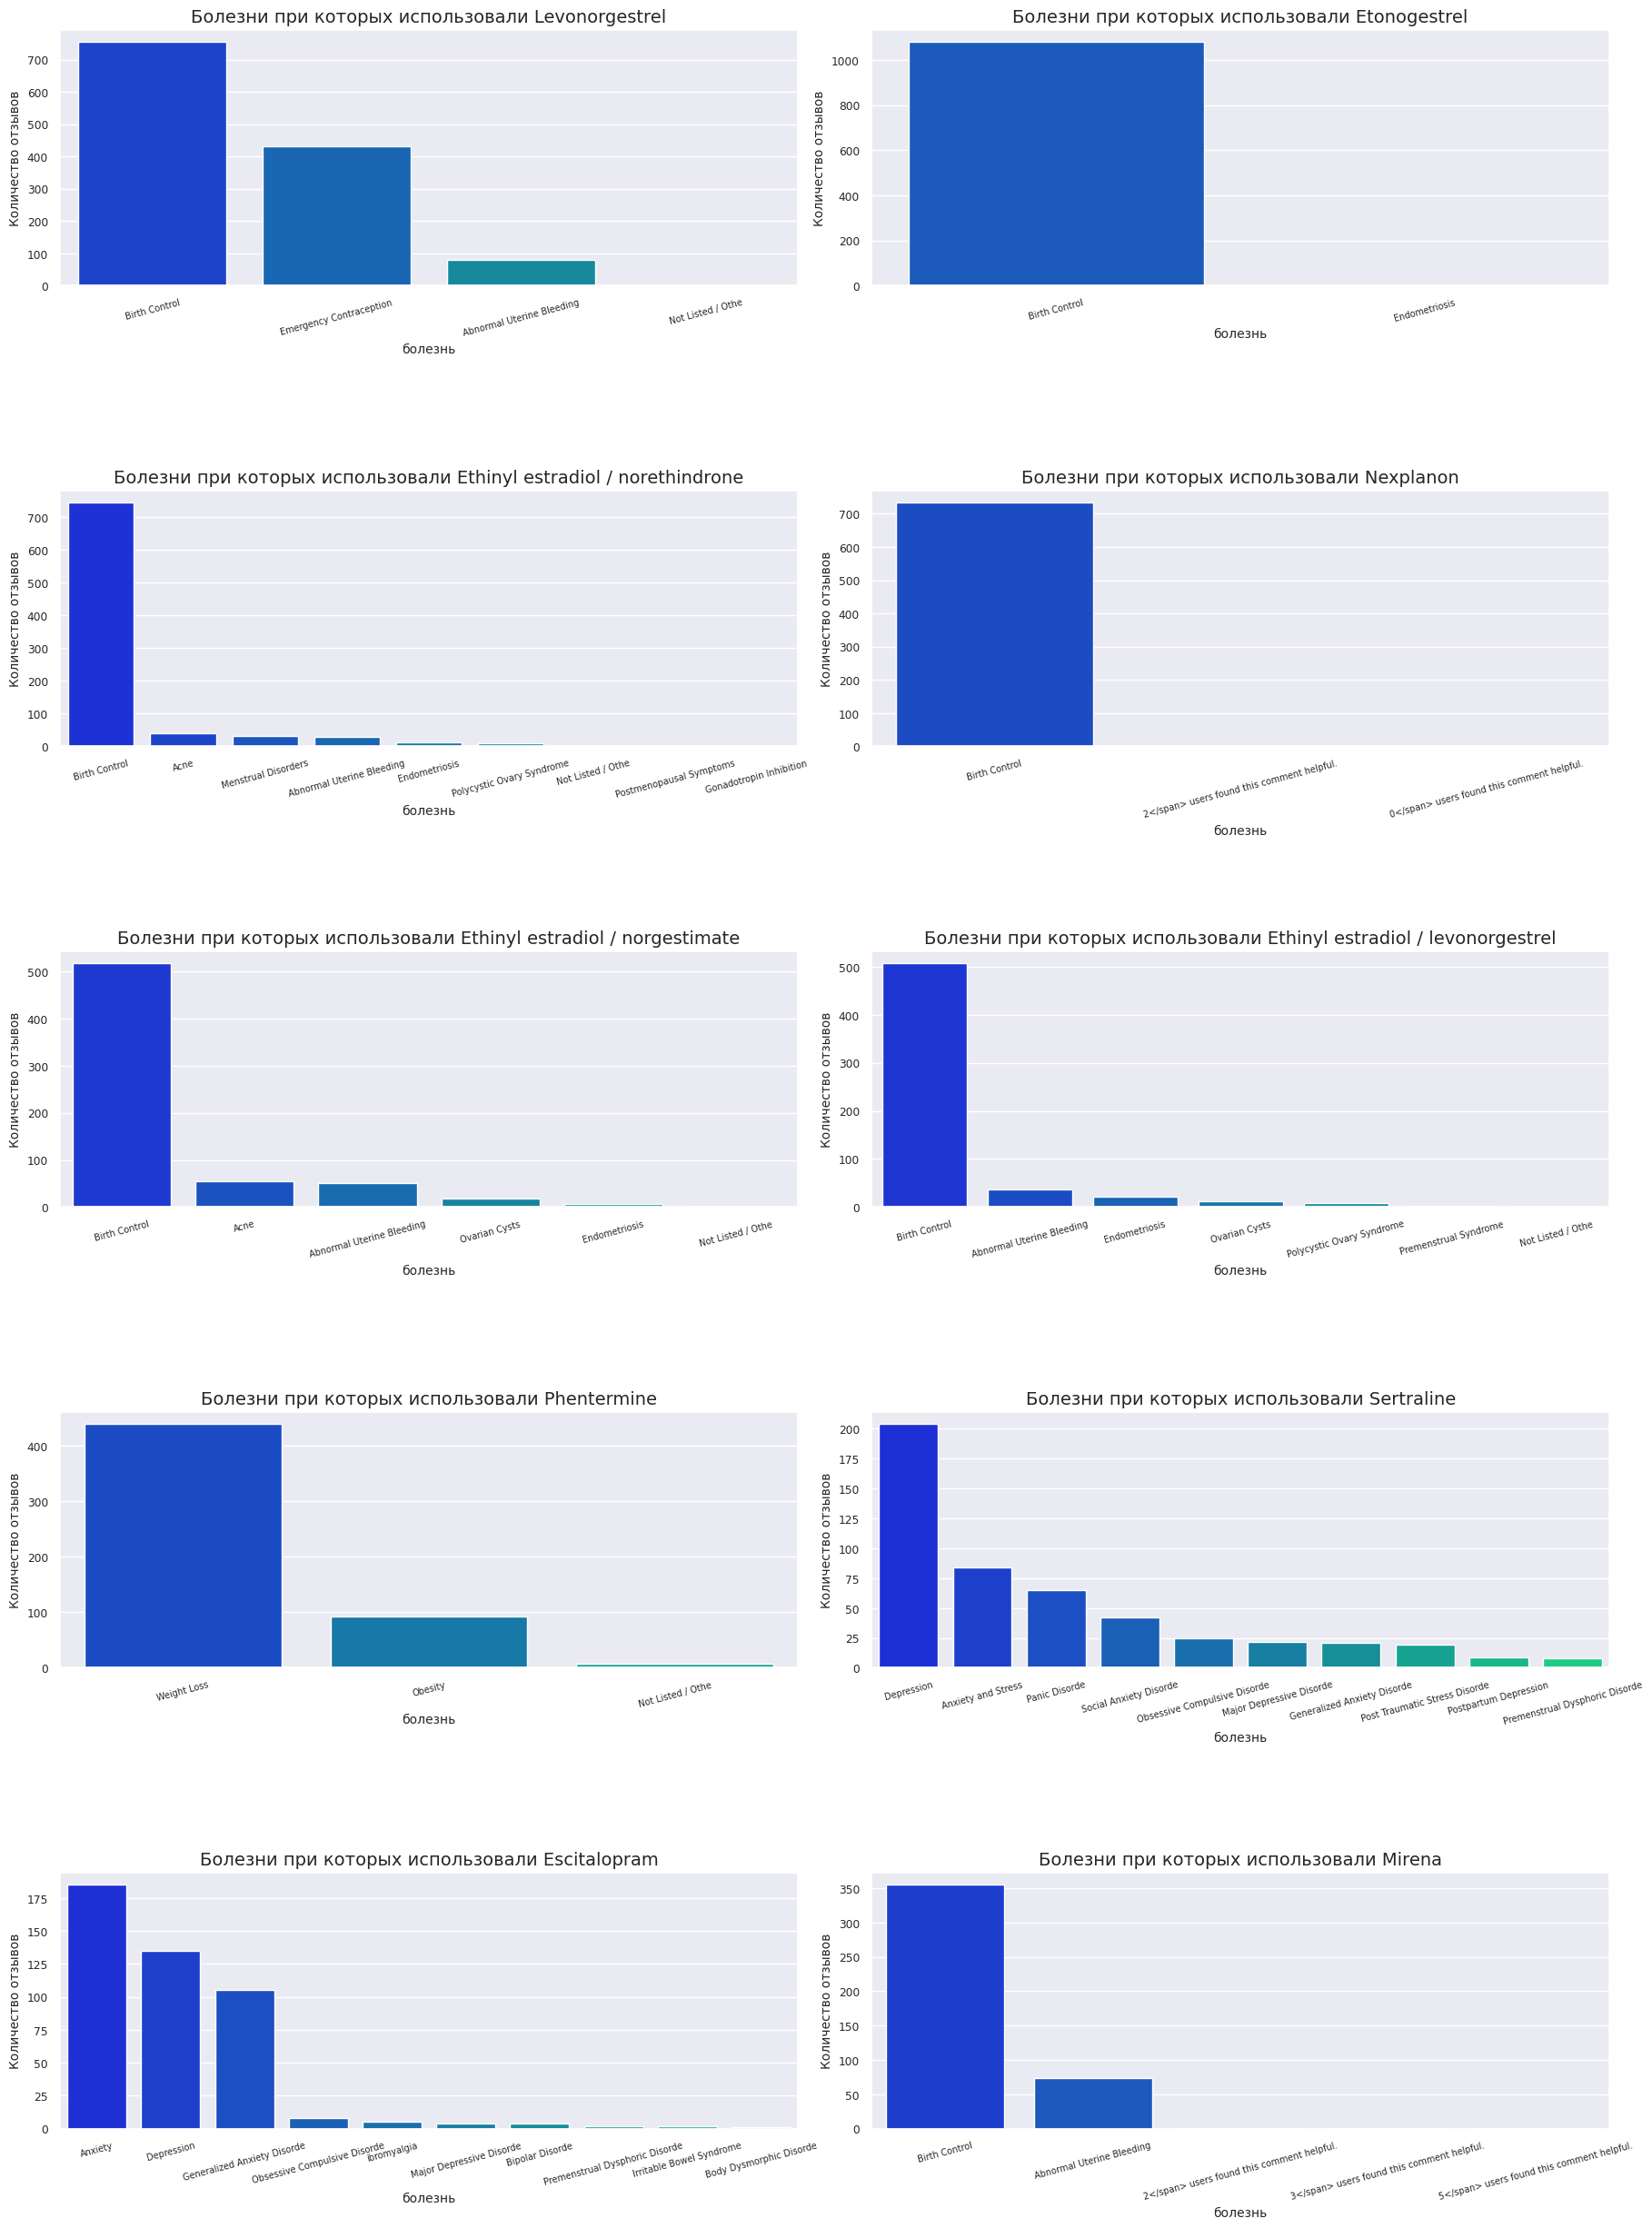

In [ ]:
plt.rcParams['figure.figsize'] = [22, 30]
sns.set(style = 'darkgrid', font_scale = 0.8)
plt.xticks(rotation = 30, fontsize = 8)
plt.subplots_adjust(wspace=0.1, hspace=0.8)
for i in range(0,10):
  #разбиение фигуры на 10 ячеек, 5 строк, 2 столбца и выбор для отрисовке i+1 ячейки
  plt.subplot(5, 2, i+1)
#разбиение данных о количестве обзоров на лекарства на словари упорядоченные по количеству
  drugs_ = data[data['drugName'] == top_drugName[i]]['condition'].value_counts()[0: 10]
  #настройка внешнего подписей снизу гистаграм
  plt.xticks(rotation = 15, fontsize = 7)
  sns_ = sns.barplot(x = drugs_.index, y = drugs_.values, palette = 'winter')
  sns_.set_title("Болезни при которых использовали "+top_drugName[i],fontsize= 14)
  sns_.set_xlabel("болезнь", fontsize = 10)
  sns_.set_ylabel("Количество отзывов", fontsize = 10);


рассмотрев графики можно понять что некоторые лекарства использовались только при одних и тех же болезнях, а некоторые при широком спектре зоболеваний

## **Какие лекарства чаще всего используются для наиболее частых болезней**

выясним наиболее частые болезни

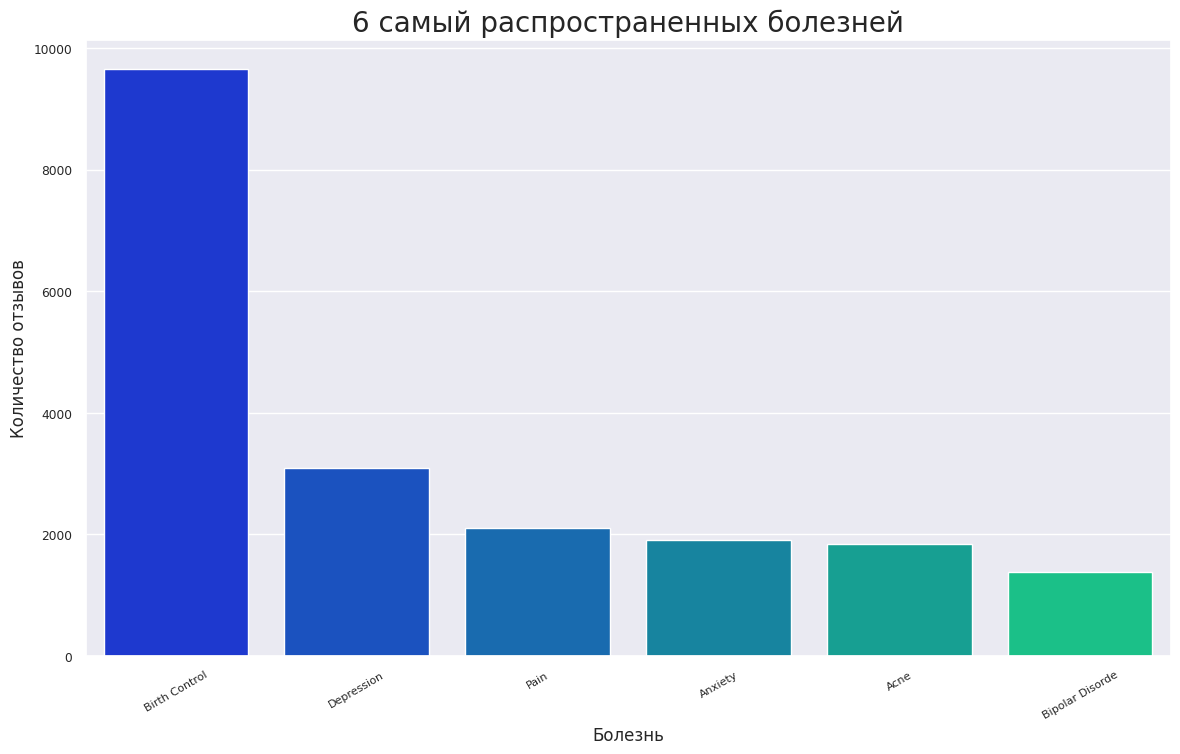

In [ ]:
#разбиение данных о количестве обзоров на лекарства на словари упорядоченные по количеству
cond = dict(data['condition'].value_counts())

#запись 10 первых названий болезней
top_condition = list(cond.keys())[0:6]

#запись 10 первых значений количества обзоров по болезням
values = list(cond.values())[0:6]

#настройка внешнего вида фигуры
sns.set(style = 'darkgrid', font_scale = 0.8)
plt.rcParams['figure.figsize'] = [14, 8]
plt.xticks(rotation = 30, fontsize = 8)

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_title("6 самый распространенных болезней",fontsize= 20)
sns_.set_xlabel("Болезнь", fontsize = 12)
sns_.set_ylabel("Количество отзывов", fontsize = 12);

С большим отрывом самое распространенное заболевание связано с репродукцией.

используя полученный список из 5 самых распространенных болезней можно построить гистаграммы использованных препаратов для каждого заболевания.

<ipython-input-61-20845ebc5904>:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, i+1)


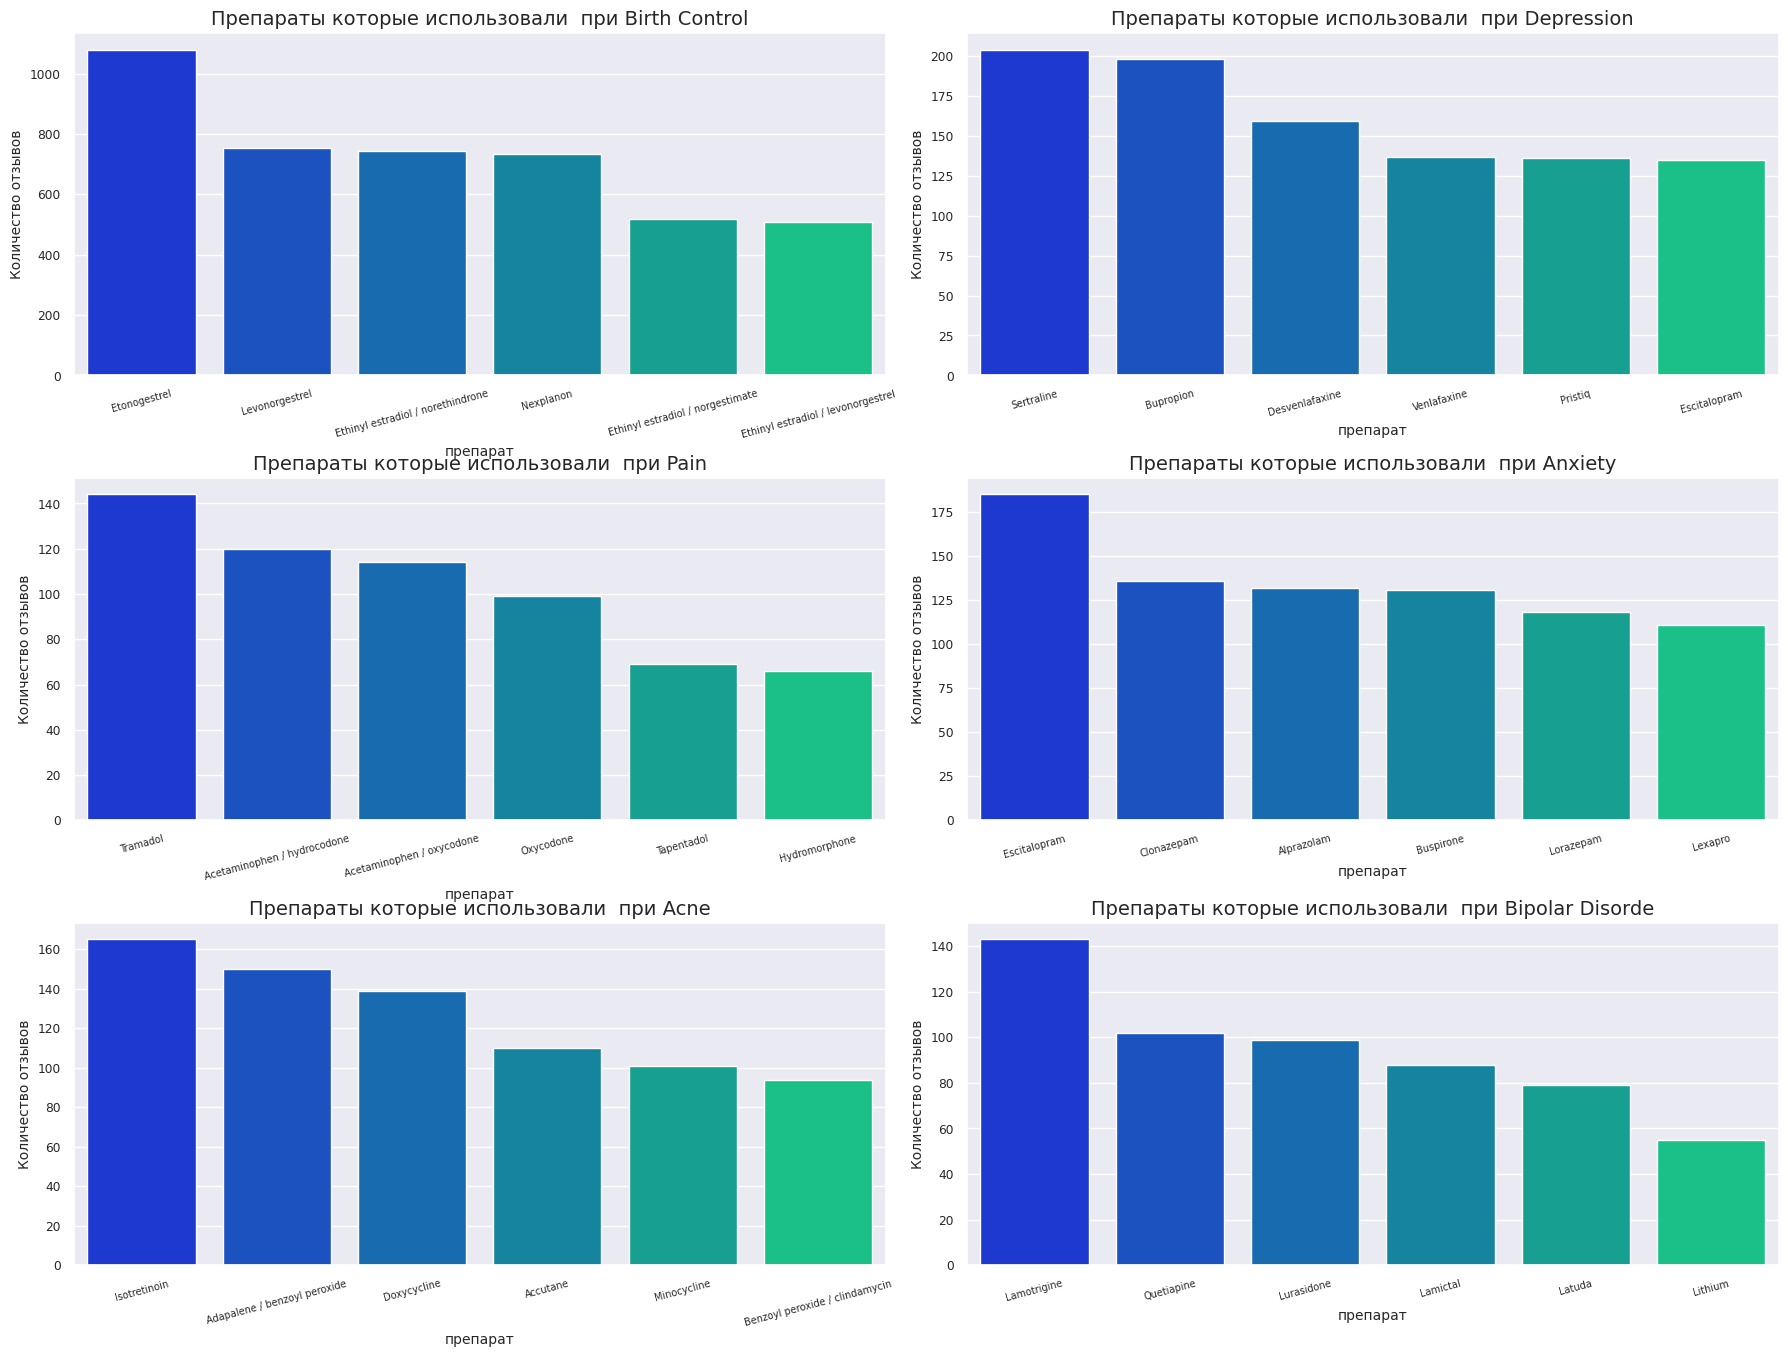

In [ ]:
#настройка внешнего вида фигуры
plt.rcParams['figure.figsize'] = [22, 16]
sns.set(style = 'darkgrid', font_scale = 0.8)
plt.xticks(rotation = 30, fontsize = 8)
plt.subplots_adjust(wspace=0.1, hspace=0.3)

#разбиение данных о количестве обзоров на лекарства на словари упорядоченные по количеству
cond = dict(data['condition'].value_counts())

#запись 6 первых названий болезней
top_condition = list(cond.keys())[0:6]

for i in range(0,6):
  #разбиение фигуры на 6 ячеек, 5 строки, 2 столбца и выбор для отрисовке i+1 ячейки
  plt.subplot(3, 2, i+1)
#разбиение данных о количестве обзоров на лекарства на словари упорядоченные по количеству
  drugs_ = data[data['condition'] == top_condition[i]]['drugName'].value_counts()[0: 6]
  #настройка внешнего подписей снизу гистаграм
  plt.xticks(rotation = 15, fontsize = 7)
  sns_ = sns.barplot(x = drugs_.index, y = drugs_.values, palette = 'winter')
  sns_.set_title("Препараты которые использовали  при "+top_condition[i],fontsize= 14)
  sns_.set_xlabel("препарат", fontsize = 10)
  sns_.set_ylabel("Количество отзывов", fontsize = 10);

Таким образом на 6 гистаграмах представленны лекарства которые используют при 6 самых растространенных заболеваниях

## **Как зависит качество лекарства в обзорах людей от его популярности**

рассмотрим зависимость оценки в отзывах от их количества

<Axes: title={'center': '10 самый распространенных лекарств'}, xlabel='Лекарство', ylabel='Количество отзывов'>

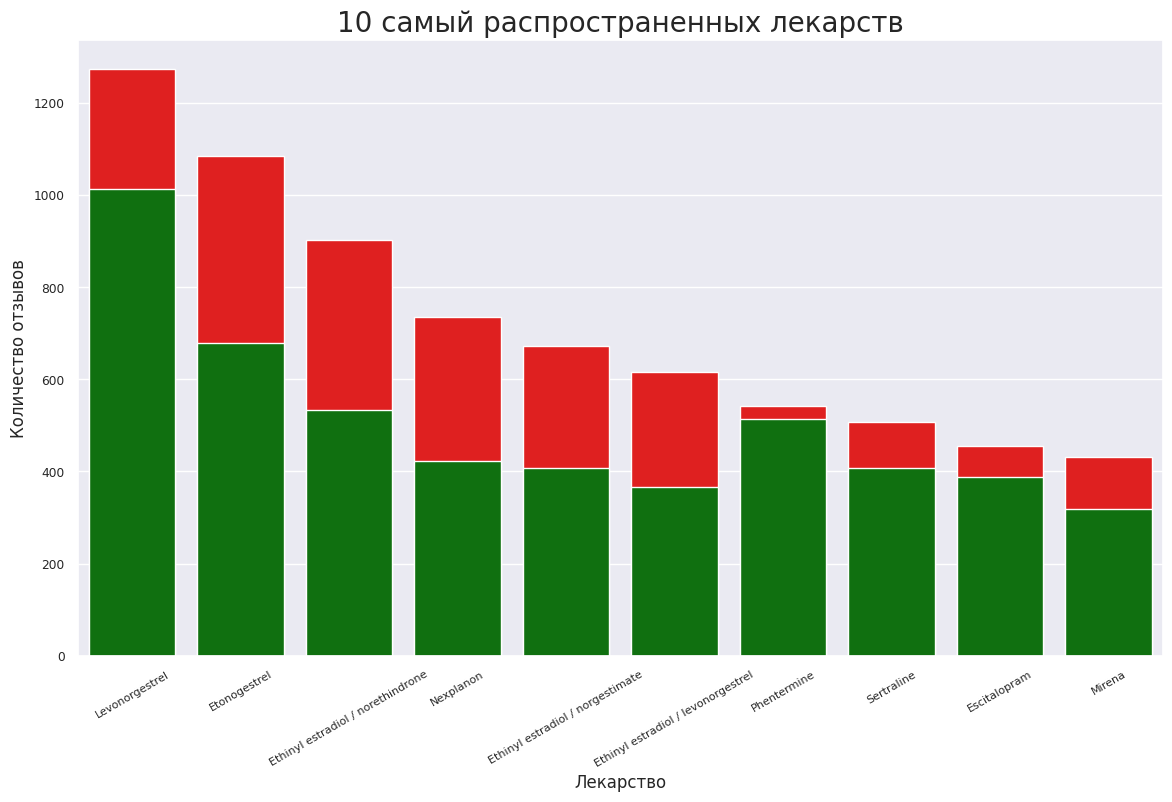

In [ ]:
#добавим новый параметр в первоначальный датасет, если оценка больше 4, то отзыв позитивный
data.loc[(data['rating'] >= 5), 'Review_Positive'] = 1
data.loc[(data['rating'] < 5), 'Review_Positive'] = 0

#выберем из датасета только позитивные отзывы
positive = data[data.Review_Positive == 1]
#создание словаря с ключами - названием лекарства а значениями - количества положительных отзывов на них
positive_ = dict(positive['drugName'].value_counts())

#разбиение данных о количестве обзоров на лекарства на словари упорядоченные по количеству
cond = dict(data['drugName'].value_counts())
#запись 10 первых названий лекарств
top_drugName = list(cond.keys())[0:10]

#запись 10 первых значений количества обзоров на лекарства
values = list(cond.values())[0:10]

#настройка внешнего вида фигуры
sns.set(style = 'darkgrid', font_scale = 0.8)
plt.rcParams['figure.figsize'] = [14, 8]
plt.xticks(rotation = 30, fontsize = 8)

sns_ = sns.barplot(x = top_drugName, y = values, color = 'red')
sns_.set_title("10 самый распространенных лекарств",fontsize= 20)
sns_.set_xlabel("Лекарство", fontsize = 12)
sns_.set_ylabel("Количество отзывов", fontsize = 12);

#создадим список значений положительных отзывов у самых популярных лекарств
values_p = []
for i in top_drugName:
  values_p.append(positive_[i])

sns.barplot(x = top_drugName, y = values_p, color = 'green')

на данной гистаграмме зеленым указано количество положительных отзывов,а красным отрицательных.
прямая зависимость между % положительных отзывов и распространенностью лекарства прослеживается плохо.

Проделаем тоже самое на лекарствах которые используют при болезнях репродукции

<ipython-input-63-b83a276b35c1>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  positive = data[data['condition'] == 'Birth Control'][data.Review_Positive == 1]


<Axes: title={'center': 'Самые распространенные лекарства при Birth Control'}, xlabel='Лекарство', ylabel='Количество отзывов'>

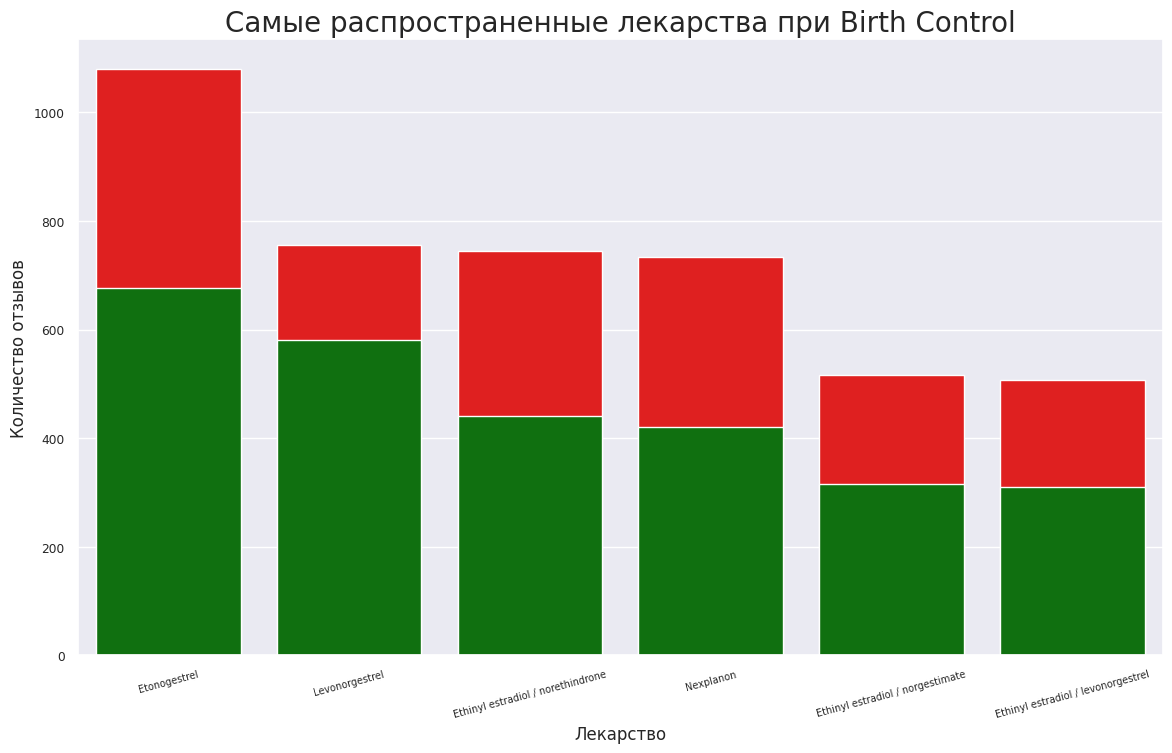

In [ ]:
#добавим новый параметр в первоначальный датасет, если оценка больше 4, то отзыв позитивный
data.loc[(data['rating'] >= 5), 'Review_Positive'] = 1
data.loc[(data['rating'] < 5), 'Review_Positive'] = 0

#выберем из датасета только позитивные отзывы с болезнью Birth Control
positive = data[data['condition'] == 'Birth Control'][data.Review_Positive == 1]
#создание словаря с ключами - названием лекарства а значениями - количества положительных отзывов на них
positive_ = dict(positive['drugName'].value_counts())

#разбиение данных о количестве обзоров на лекарства на словари упорядоченные по количеству
cond = dict(data['drugName'].value_counts())
#запись 10 первых названий лекарств
top_drugName = list(cond.keys())[0:10]

#запись 10 первых значений количества обзоров на лекарства
values = list(cond.values())[0:10]

#настройка внешнего вида фигуры
sns.set(style = 'darkgrid', font_scale = 0.8)
plt.rcParams['figure.figsize'] = [14, 8]
plt.xticks(rotation = 30, fontsize = 8)

drugs_ = data[data['condition'] == 'Birth Control']['drugName'].value_counts()[0: 6]
#настройка внешнего подписей снизу гистаграм
plt.xticks(rotation = 15, fontsize = 7)
sns_ = sns.barplot(x = drugs_.index, y = drugs_.values, color = 'red')
sns_.set_title("Самые распространенные лекарства при Birth Control",fontsize= 20)
sns_.set_xlabel("Лекарство", fontsize = 12)
sns_.set_ylabel("Количество отзывов", fontsize = 12);

#создадим список значений положительных отзывов у самых популярных лекарств в отзывах с болезнью Birth Control
values_p = []
for i in drugs_.index:
  values_p.append(positive_[i])

sns.barplot(x = drugs_.index, y = values_p, color = 'green')

In [ ]:
#Проверка соотношения положительных отзывов к отрицательным
for i in range(0,6):
  print('Для ',drugs_.index[i],'количество положительных отзывов ',round((values_p[i]/drugs_.values[i])*100, 2),"%")

Для  Etonogestrel количество положительных отзывов  62.59 %
Для  Levonorgestrel количество положительных отзывов  76.95 %
Для  Ethinyl estradiol / norethindrone количество положительных отзывов  59.27 %
Для  Nexplanon количество положительных отзывов  57.36 %
Для  Ethinyl estradiol / norgestimate количество положительных отзывов  61.12 %
Для  Ethinyl estradiol / levonorgestrel количество положительных отзывов  61.14 %


Для конкретных болезней кореляция между оценкой и количеством отзывов также не прослеживается

## **Какие еще можно сделать выводы из группировки**

можно разбить колонку Date на 3 колонки День,месяц и год и проанализировать данные по новым параметрам

In [ ]:
# конвертирование данных в встроенный формат данных "datetime"
data['date'] = pd.to_datetime(data['date'], errors = 'coerce')

# создание 3 новых параметров
data['Year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

data.head()

,drugName,condition,review,rating,date,usefulCount,Review_Positive,Year,month,day
uniqueID,,,,,,,,,,
163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,2012-02-28,22,1.0,2012,2,28
206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,2009-05-17,17,1.0,2009,5,17
159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,2017-09-29,3,1.0,2017,9,29
39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,2017-03-05,35,1.0,2017,3,5
97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,2015-10-22,4,1.0,2015,10,22


Далее можно создать гистаграммы опираясь на новые параметры

Text(0, 0.5, 'Количество отзывов')

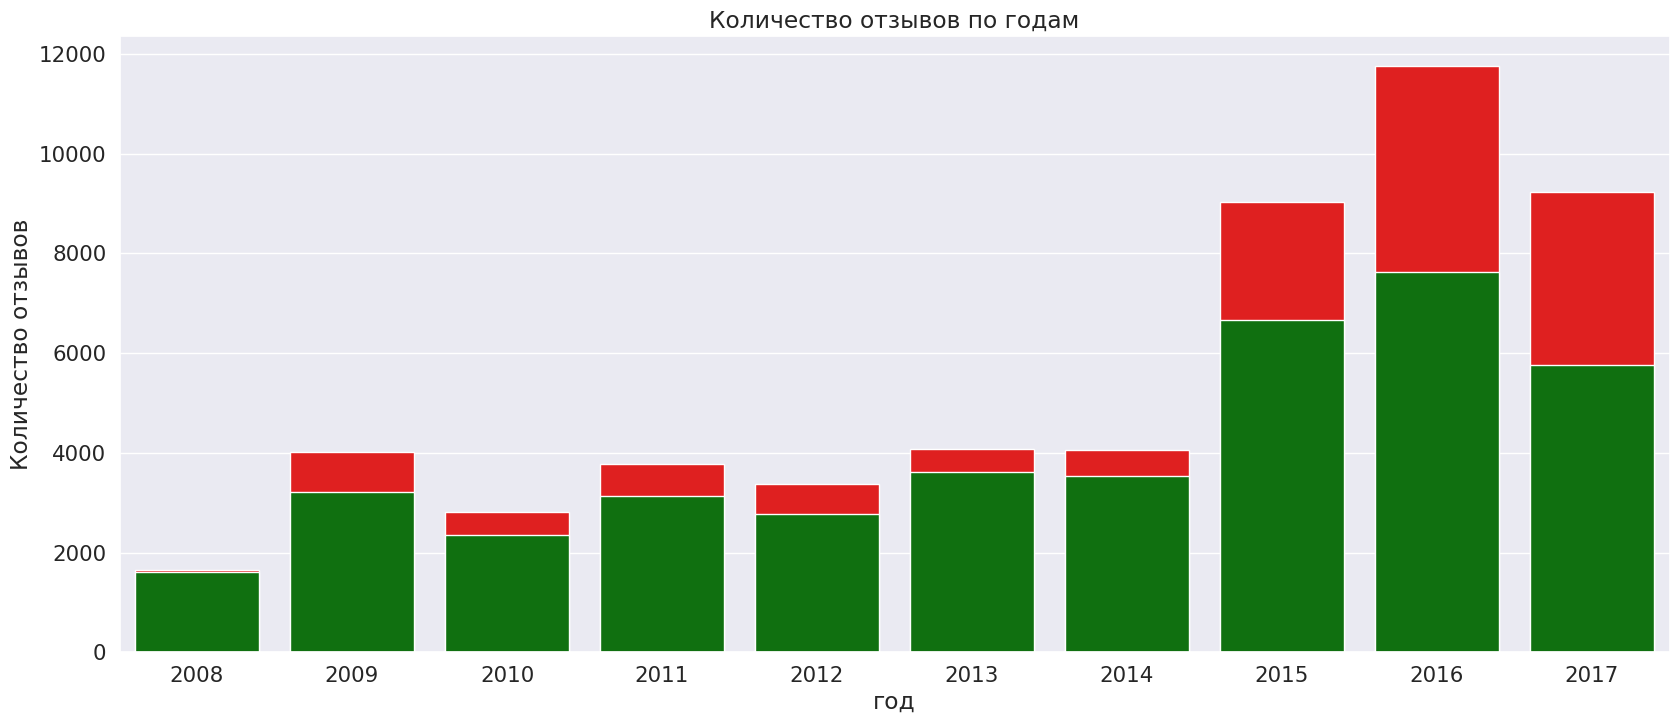

In [ ]:
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'darkgrid')

positive = data[data.Review_Positive == 1]
sns_ = sns.countplot(x= 'Year', data = data, color = 'red')
sns_ = sns.countplot(x= 'Year', data = positive, color = 'green')
sns_.set_title('Количество отзывов по годам')
sns_.set_xlabel("год")
sns_.set_ylabel("Количество отзывов")

In [ ]:
#Проверка соотношения положительных отзывов к отрицательным по годам

#создание пустого списка
positive_year = []
for i in range(2008,2018):
  #добавление в список значения количества отзывов за год
  positive_year.append(round((positive['Year'].tolist().count(i)/data['Year'].tolist().count(i))*100, 2))
  print('в ',i,' году количество положительных отзывов ',positive_year[i-2008],"%")

в  2008  году количество положительных отзывов  97.21 %
в  2009  году количество положительных отзывов  80.15 %
в  2010  году количество положительных отзывов  83.3 %
в  2011  году количество положительных отзывов  83.11 %
в  2012  году количество положительных отзывов  82.16 %
в  2013  году количество положительных отзывов  88.43 %
в  2014  году количество положительных отзывов  87.29 %
в  2015  году количество положительных отзывов  73.78 %
в  2016  году количество положительных отзывов  64.85 %
в  2017  году количество положительных отзывов  62.51 %


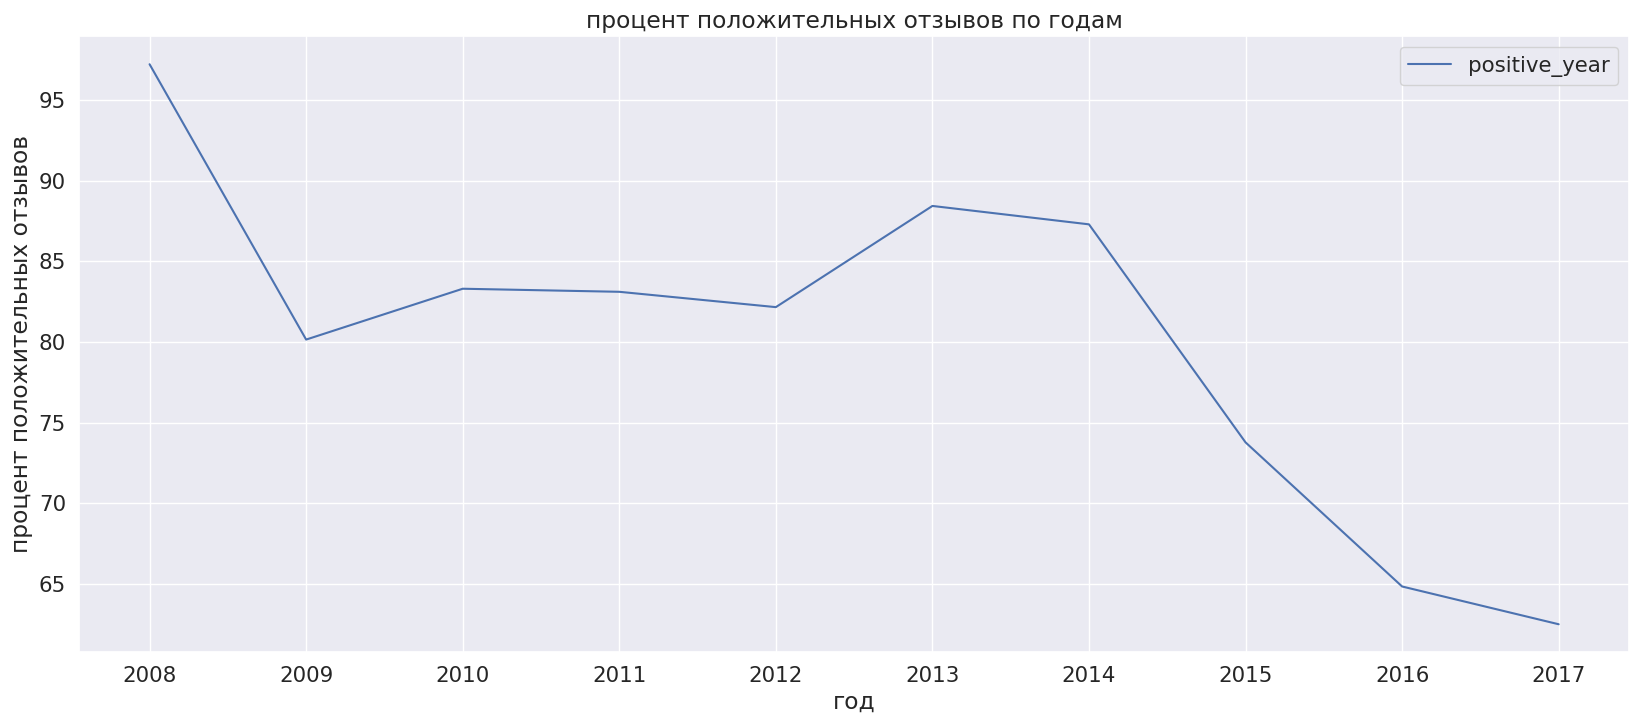

In [ ]:
year = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
frame = pd.DataFrame({'year' : year,'positive_year' : positive_year})
sns_ = frame.plot(x = 'year')
sns_.set_title('процент положительных отзывов по годам')
sns_.set_xlabel("год")
sns_.set_ylabel("процент положительных отзывов")
sns_ = plt.xticks(np.arange(min(year), max(year)+1, 1.0))

Тоже самое но по месяцам

Text(0, 0.5, 'Количество отзывов')

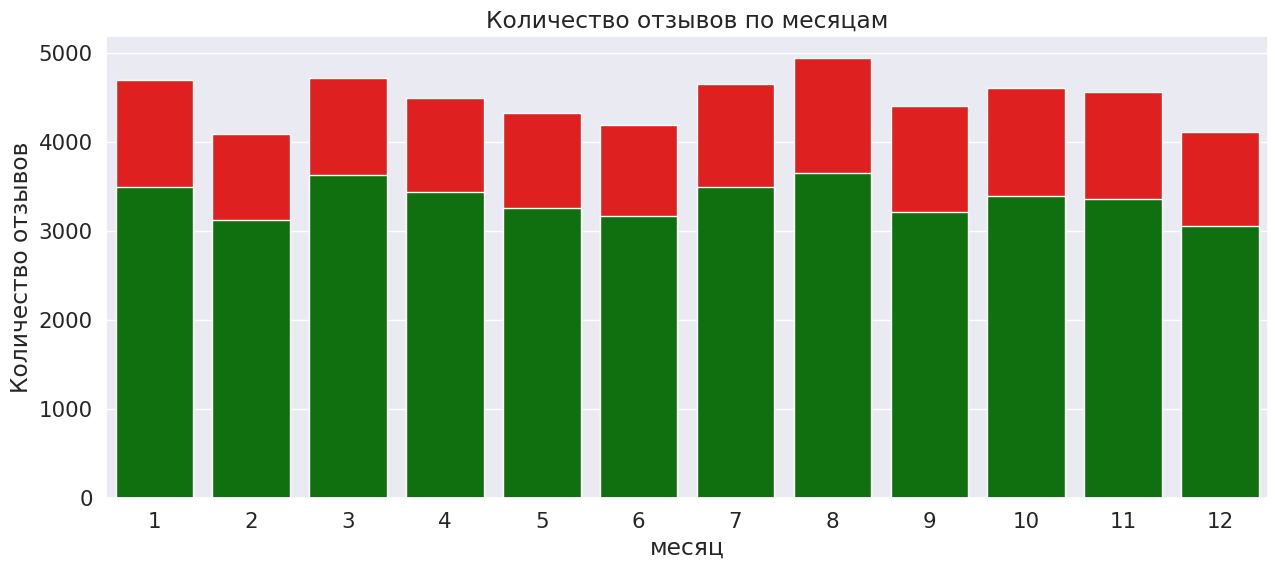

In [ ]:
plt.rcParams['figure.figsize'] = [15,6]
sns.set(font_scale = 1.4, style = 'darkgrid')

positive = data[data.Review_Positive == 1]
sns_ = sns.countplot(x= 'month', data = data, color = 'red')
sns_ = sns.countplot(x= 'month', data = positive, color = 'green')
sns_.set_title('Количество отзывов по месяцам')
sns_.set_xlabel("месяц")
sns_.set_ylabel("Количество отзывов")

In [ ]:
#Проверка соотношения положительных отзывов к отрицательным по годам

#создание пустого списка
positive_month = []
for i in range(1,13):
  #добавление в список значения количества отзывов за год
  positive_month.append(round((positive['month'].tolist().count(i)/data['month'].tolist().count(i))*100, 2))
  print('в ',i,' месяце количество положительных отзывов ',positive_month[i-1],"%")

в  1  месяце количество положительных отзывов  74.54 %
в  2  месяце количество положительных отзывов  76.37 %
в  3  месяце количество положительных отзывов  76.86 %
в  4  месяце количество положительных отзывов  76.54 %
в  5  месяце количество положительных отзывов  75.18 %
в  6  месяце количество положительных отзывов  75.51 %
в  7  месяце количество положительных отзывов  75.17 %
в  8  месяце количество положительных отзывов  73.97 %
в  9  месяце количество положительных отзывов  73.01 %
в  10  месяце количество положительных отзывов  73.81 %
в  11  месяце количество положительных отзывов  73.72 %
в  12  месяце количество положительных отзывов  74.2 %


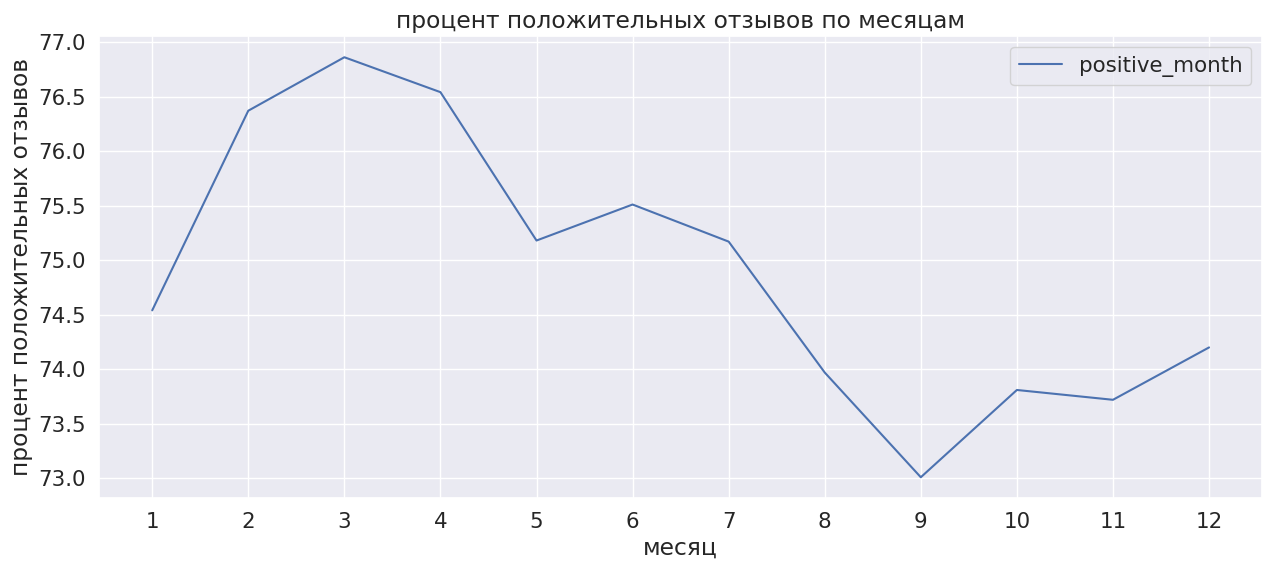

In [ ]:
month = range(1,13)
frame = pd.DataFrame({'month' : month,'positive_month' : positive_month})
sns_ = frame.plot(x = 'month')
sns_.set_title('процент положительных отзывов по месяцам')
sns_.set_xlabel("месяц")
sns_.set_ylabel("процент положительных отзывов")
sns_ = plt.xticks(np.arange(min(month), max(month)+1, 1.0))

Визуально оценивая полученные данные, можно сделать вывод что процент положительных отзывов слабо валотилен и цикличен с максимальным значением в марте и минимальным в сентябре

## **решение задачи регрессии для колонки rating**

Первоначально необходимо отформатировать набор данных


In [ ]:
df = data;
#старый параметр даты уже не нужен
df.drop(columns = ['date', 'day'],axis=1, inplace=True, errors='ignore') #колонка дня так же не имеет ценности
df


,drugName,condition,review,rating,usefulCount,Review_Positive,Year,month
uniqueID,,,,,,,,
163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,22,1.0,2012,2
206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17,1.0,2009,5
159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,3,1.0,2017,9
39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,35,1.0,2017,3
97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,4,1.0,2015,10
...,...,...,...,...,...,...,...,...
159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,43,1.0,2014,9
140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,11,1.0,2016,10
130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,7,1.0,2010,11


Столбец отзыва имеет много инфармации и следует отформатировать данные в нём

In [ ]:
#объявление функции форматирования текста
def review_clean(review):
  #изменение регистра на нижний
  review = review.str.lower()

  # удаления частовстречающегося патерна &#039;
  review = review.str.replace("&#039;", "", regex = True)

  # замена всех специальных знаков на пробел
  review = review.str.replace(r'[^\w\d\s]',' ', regex = True)

  # замена всех не ASCII знаков
  review = review.str.replace(r'[^\x00-\x7F]+',' ', regex = True)

  # удаление пробелов в начале или конце строки
  review = review.str.replace(r'^\s+|\s+?$','', regex = True)

  # замена многократных пробелов на один
  review = review.str.replace(r'\s+',' ', regex = True)

  # замена многократных точек на одну
  dataframe = review.str.replace(r'\.{2,}', ' ', regex = True)

  return dataframe

df['review_clean'] = review_clean(df['review'])
df['review_clean']

uniqueID
163740    ive tried a few antidepressants over the years...
206473    my son has crohns disease and has done very we...
159672                          quick reduction of symptoms
39293     contrave combines drugs that were used for alc...
97768     i have been on this birth control for one cycl...
                                ...                        
159999    i have taken tamoxifen for 5 years side effect...
140714    ive been taking lexapro escitaploprgram since ...
130945    im married 34 years old and i have no kids tak...
47656     i was prescribed nucynta for severe neck shoul...
113712                                             it works
Name: review_clean, Length: 53766, dtype: object

Удаление союзов и прочих малозначимых слов

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk = nltk.download('stopwords')

#определение малозначимых слов
stop_words = set(stopwords.words('english')+['ive','im'])

#удаление малозначимых слов в отзыве
df['review_clean'] = df['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))
df['review_clean'].head(3)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


uniqueID
163740    tried antidepressants years citalopram fluoxet...
206473    son crohns disease done well asacol complaints...
159672                             quick reduction symptoms
Name: review_clean, dtype: object

Далее можно удалить окончания слов

In [ ]:
import nltk
from nltk.stem import SnowballStemmer
Snow_ball = SnowballStemmer("english")
data['review_clean'] = data['review_clean'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))
data['review_clean']

uniqueID
163740    tri antidepress year citalopram fluoxetin amit...
206473    son crohn diseas done well asacol complaint sh...
159672                                 quick reduct symptom
39293     contrav combin drug use alcohol smoke opioid c...
97768     birth control one cycl read review type simila...
                                ...                        
159999    taken tamoxifen 5 year side effect sever sweat...
140714    take lexapro escitaploprgram sinc februari fir...
130945    marri 34 year old kid take pill hassl decid ge...
47656     prescrib nucynta sever neck shoulder pain take...
113712                                                 work
Name: review_clean, Length: 53766, dtype: object

определение настроения текста с помощью модуля Textblop

In [ ]:
from textblob import TextBlob

#определение функции которая для каждого отзыва будет считать настроение
def sentiment(review):
    #Полярность настроения в отзывах
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

использование функции для расчета настроения отзыва

In [ ]:
#для необработанного отзыва
df['sentiment'] = sentiment(df['review'])
#для обработанного отзыва
df['sentiment_clean'] = sentiment(df['review_clean'])

# Использование функции очистки, но без удаления союзов и окончаний
df['review_clean_ss'] = review_clean(df['review'])
# использование функции расчета настроения на очищенных отзывах но без удаления союзов и окончаний
df['sentiment_clean_ss'] = sentiment(df['review_clean_ss'])

Удаление неопределенных значений в датасете

In [ ]:
df = df.dropna(how="any", axis=0)

Определение новых параметров данных

In [ ]:
import string
#количество слов в отзыве
df['count_word']=df["review_clean_ss"].apply(lambda x: len(str(x).split()))

#количество уникальных слов
df['count_unique_word']=df["review_clean_ss"].apply(lambda x: len(set(str(x).split())))

#количество знаков
df['count_letters']=df["review_clean_ss"].apply(lambda x: len(str(x)))

#количество знаков припенания
df["count_punctuations"] = df["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#количество слов в верхнем регистре
df["count_words_upper"] = df["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#количество слов с заглавной буквы
df["count_words_title"] = df["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#количество малозначимых слов
df["count_stopwords"] = df["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

#средняя длина слов
df["mean_word_len"] = df["review_clean_ss"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df.columns

<ipython-input-79-59d6fc5907b5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count_word']=df["review_clean_ss"].apply(lambda x: len(str(x).split()))
<ipython-input-79-59d6fc5907b5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count_unique_word']=df["review_clean_ss"].apply(lambda x: len(set(str(x).split())))
<ipython-input-79-59d6fc5907b5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

Index(['drugName', 'condition', 'review', 'rating', 'usefulCount',
       'Review_Positive', 'Year', 'month', 'review_clean', 'sentiment',
       'sentiment_clean', 'review_clean_ss', 'sentiment_clean_ss',
       'count_word', 'count_unique_word', 'count_letters',
       'count_punctuations', 'count_words_upper', 'count_words_title',
       'count_stopwords', 'mean_word_len'],
      dtype='object')

Так как уникальных названий лекарст 2600 а уникальных названий болезней 700, кодирование ohe-hote для них не подходит. По этому следует использовать кодировщик меток, для перекодирования этих даных из строковых в числовые

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder_feat = {}
for feature in ['drugName', 'condition']:
    label_encoder_feat[feature] = LabelEncoder()
    df[feature] = label_encoder_feat[feature].fit_transform(df[feature])

df[['drugName','condition']]

<ipython-input-80-3bf113046ce1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = label_encoder_feat[feature].fit_transform(df[feature])
<ipython-input-80-3bf113046ce1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = label_encoder_feat[feature].fit_transform(df[feature])


,drugName,condition
uniqueID,,
163740,1560,201
206473,1488,185
159672,293,656
39293,592,676
97768,621,122
...,...,...
159999,2263,135
140714,884,87
130945,1348,122


Так как унимальных значений month только 12, а Year 9 ohe-hote кодирование этих столцев не сильно усложнит обучение модели  

In [ ]:
df = pd.get_dummies (df, columns=['month', 'Year'], drop_first= True)

список всех получившихся параметров


In [ ]:
df.columns

Index(['drugName', 'condition', 'review', 'rating', 'usefulCount',
       'Review_Positive', 'review_clean', 'sentiment', 'sentiment_clean',
       'review_clean_ss', 'sentiment_clean_ss', 'count_word',
       'count_unique_word', 'count_letters', 'count_punctuations',
       'count_words_upper', 'count_words_title', 'count_stopwords',
       'mean_word_len', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'Year_2009', 'Year_2010', 'Year_2011', 'Year_2012', 'Year_2013',
       'Year_2014', 'Year_2015', 'Year_2016', 'Year_2017'],
      dtype='object')

Определение данных для обучения и цель предсказания.
Разделение данных на обучающее и тестовое множества.

In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMModel,LGBMClassifier, plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

X = df[['drugName','condition', 'usefulCount', 'sentiment',
                   'sentiment_clean_ss', 'count_word', 'count_unique_word', 'count_letters',
                   'count_punctuations', 'count_words_upper', 'count_words_title',
                   'count_stopwords', 'mean_word_len']]

y = df['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print ("Размер обучающей выборки ", X_train.shape)
print ("Размер тестовой выборки ", X_test.shape)

Размер обучающей выборки  (37429, 13)
Размер тестовой выборки  (16042, 13)


In [ ]:
from sklearn.model_selection import GridSearchCV
#определим функцию подсчета оптимальных параметров модели
def search(X, y, model, param_name, grid, draw=True):
  parameters = {param_name: grid}

  CV_model = GridSearchCV(estimator=model, param_grid=parameters, cv=4, scoring='neg_mean_absolute_error', n_jobs=-1)
  CV_model.fit(X, y)
  means = CV_model.cv_results_['mean_test_score']
  error = CV_model.cv_results_['std_test_score']

  if draw:
      plt.figure(figsize=(15,8))
      plt.title('выбор ' + param_name)


      plt.plot(grid, means, label='mean values of score')

      plt.fill_between(grid, means - 2 * error, means + 2 * error, color='green', label='deviation area between errors')
      plt.legend()
      plt.xlabel('parameter')
      plt.ylabel('absolute_error')
      plt.show()

  return means, error

[2 3 4 5 6]


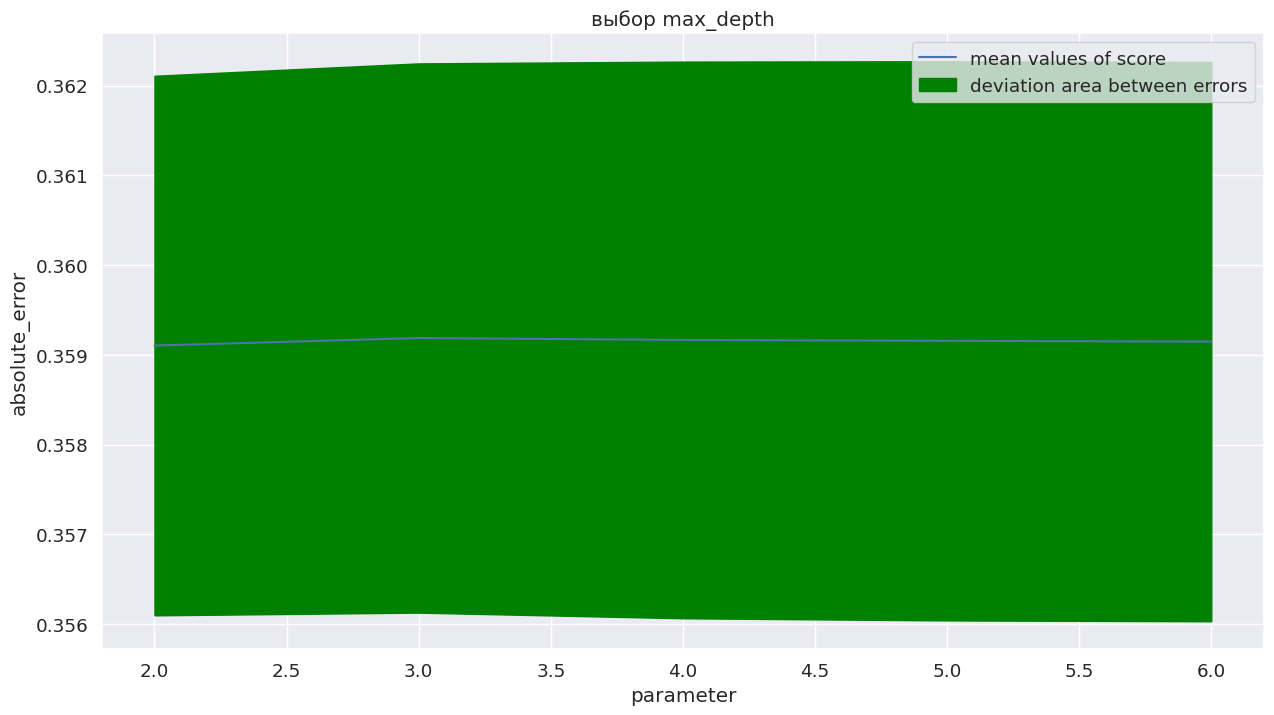

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
models = [GradientBoostingRegressor(n_estimators=200, learning_rate= 0.1, max_features=2, random_state=0)]
param_names=['max_depth']
grids = [np.arange(2,7,1)]
param_scales = ['ordinary']

for model, param_name, grid, param_scale in zip(models,
                                                param_names,
                                                grids,
                                                param_scales):
  print(grid)
  search(X_train, y_train, model, param_name, grid, param_scale)

Оптимальное значение параметра max_depth = 6

In [ ]:
# Основные параметры
# n_estimators - число деревьев
# learning_rate - вклад слабых деревьев в модель
# max_depth - глубина дерева
# max_features - число фич, например можно задать 'sqrt'
# "loss":["log_loss"] - функция потерь

from sklearn import metrics

gb_clf = GradientBoostingRegressor(n_estimators=200, learning_rate= 0.1, max_features=2, max_depth=6, random_state=0)
gb_clf.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score

result = cross_val_score(estimator=GradientBoostingRegressor(n_estimators=200, learning_rate= 0.1, max_features=2, max_depth=6, random_state=0), X=X_train, y=y_train, cv=4)
print(result)

[0.23507388 0.22426519 0.2213751  0.21848364]


In [ ]:
np.vstack(gb_clf.predict(X_test))

array([[6.87658605],
       [7.98352224],
       [9.34499448],
       ...,
       [6.29981608],
       [8.20440966],
       [8.91237773]])

Расчет наиболее весомых параметров

Text(0.5, 1.0, 'Весомость параметра')

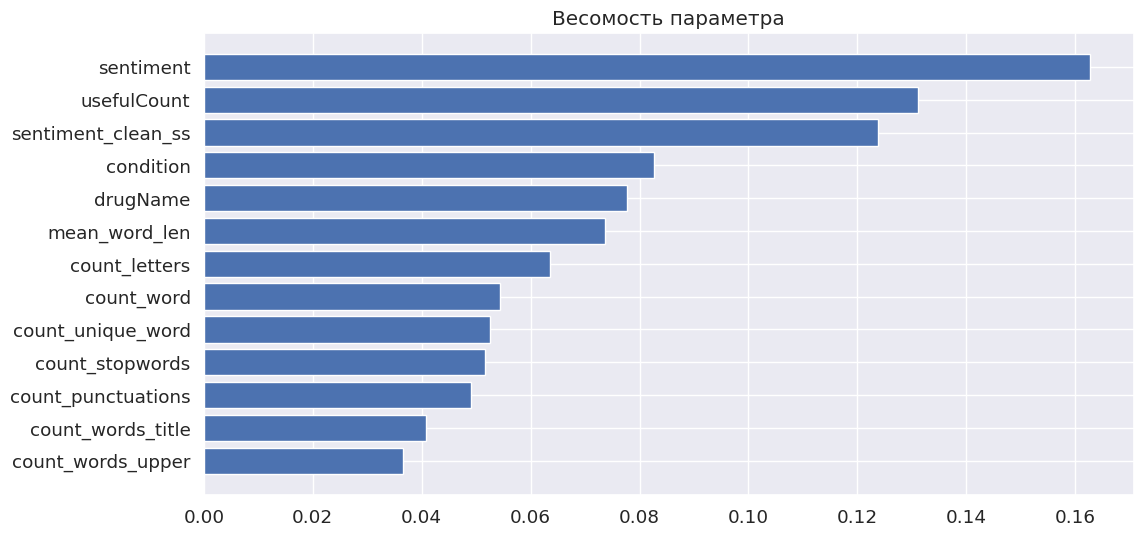

In [ ]:
feature_importance = gb_clf.feature_importances_;
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title("Весомость параметра")

Следуя гистаграмме, самые полезные колонки были новые созданные мной параметры настроения и количество человек посчитавших обзор полезным

In [ ]:
metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',